# Dry Bean Dataset

#####Data Set Information:
Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

Attribute Information:

    Area (A): The area of a bean zone and the number of pixels within its boundaries.
    Perimeter (P): Bean circumference is defined as the length of its border.
    Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
    Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
    Aspect ratio (K): Defines the relationship between L and l.
    Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
    Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
    Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
    Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
    Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
    Roundness (R): Calculated with the following formula: (4piA)/(P^2)
    Compactness (CO): Measures the roundness of an object: Ed/L
    ShapeFactor1 (SF1)
    ShapeFactor2 (SF2)
    ShapeFactor3 (SF3)
    ShapeFactor4 (SF4)
    Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dry_Bean.csv")

In [3]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [4]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [7]:
df.shape

(13611, 17)

In [8]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [9]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [10]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

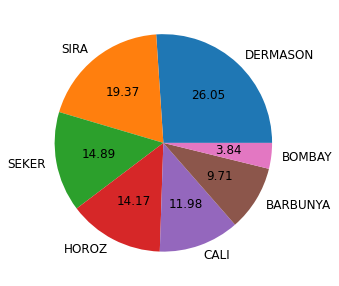

In [11]:
plt.figure(figsize=(5,5))
wedges,labels,pcts = plt.pie(x = df['Class'].value_counts().values,labels=df['Class'].value_counts().index, autopct="%.2f")
for l in labels:
    l.set_fontsize(12)
for p in pcts:
    p.set_fontsize(12)
plt.show()

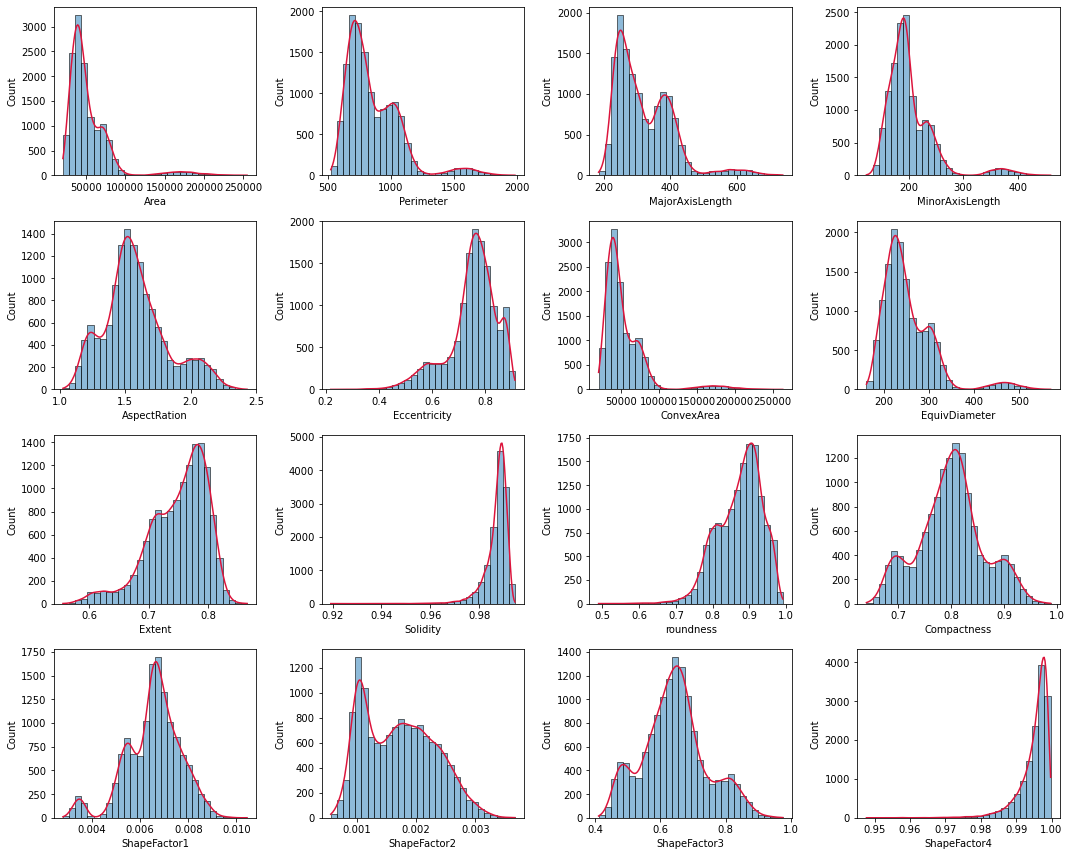

In [12]:
Numeric_cols = df.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(df[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
plt.tight_layout()


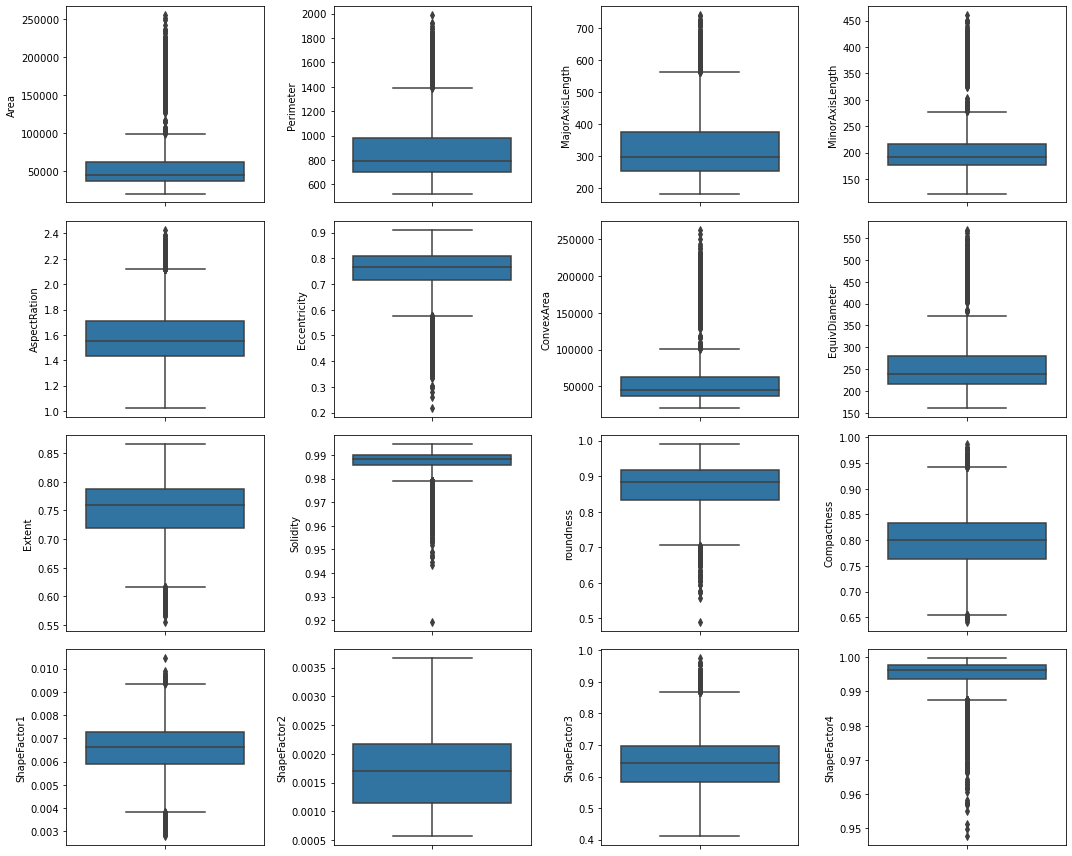

In [13]:
fig, ax = plt.subplots(4, 4, figsize=(15, 12))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(y= df[variable], ax=subplot)
plt.tight_layout()

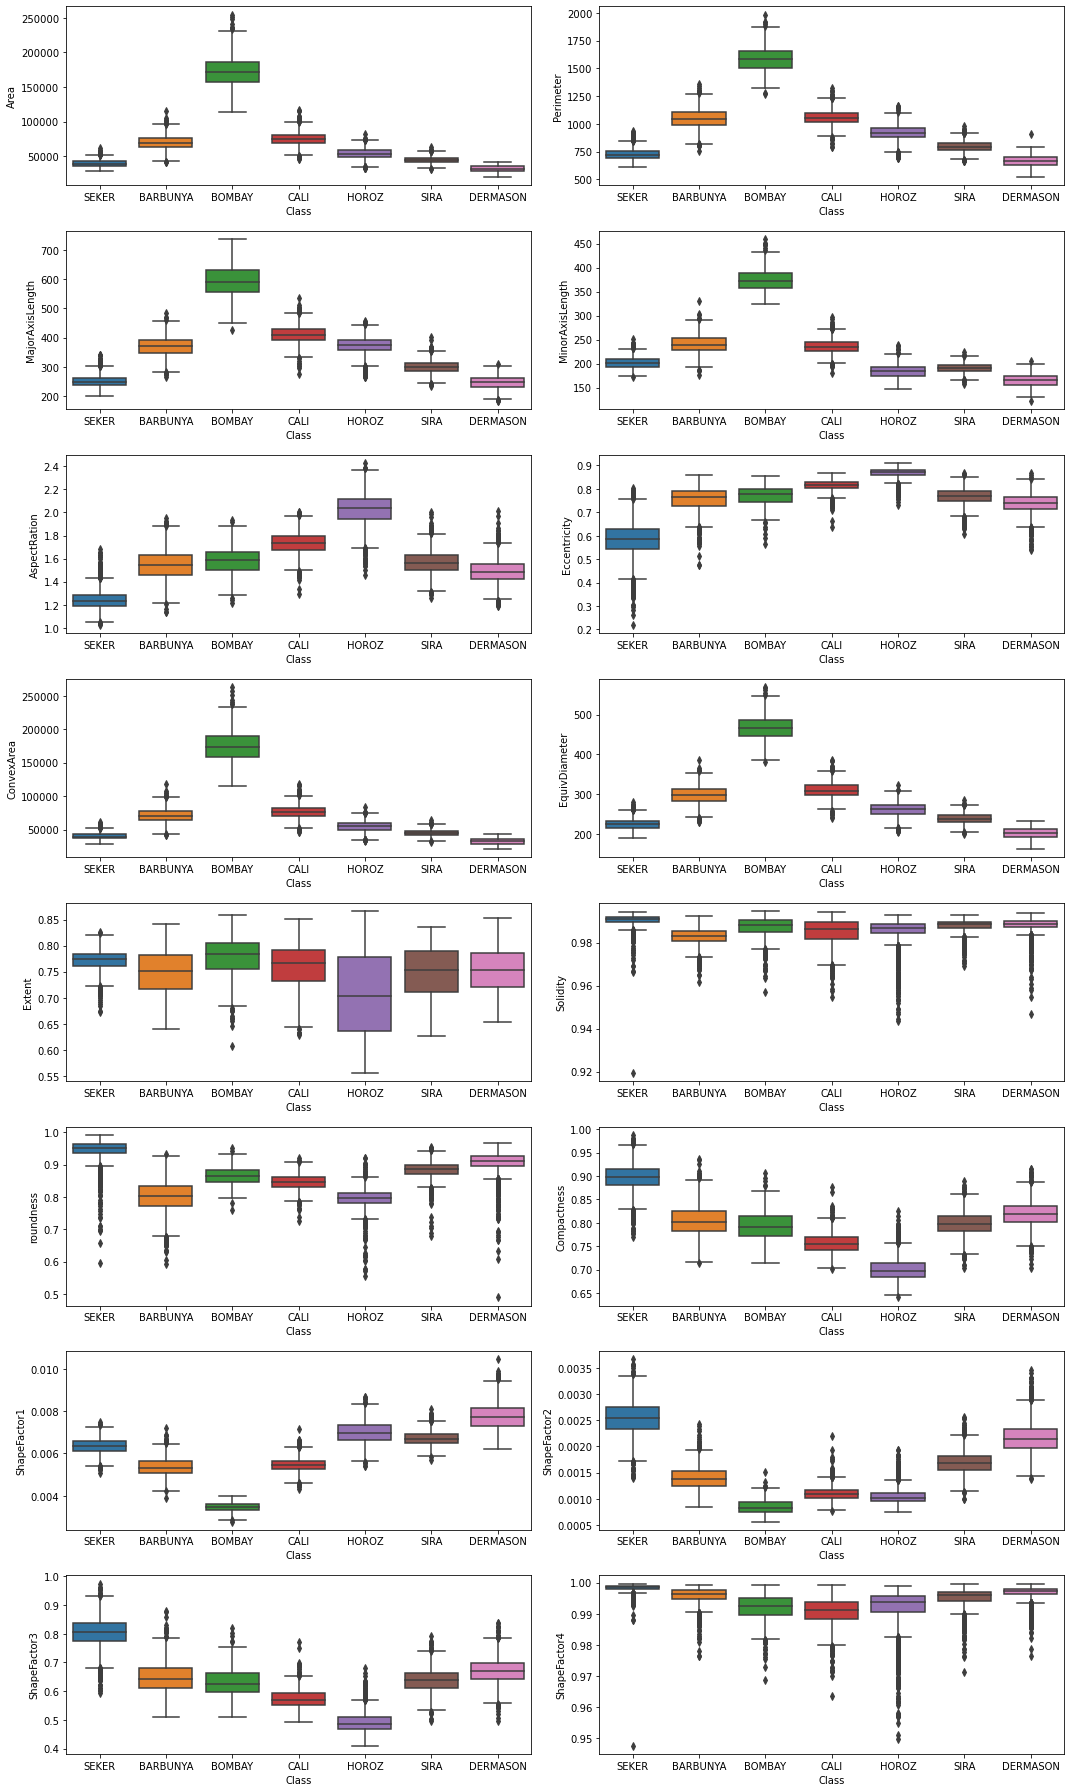

In [14]:
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=df['Class'], y= df[variable], ax=subplot)
plt.tight_layout()

In [15]:
print(df['Class'].value_counts())

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


<AxesSubplot:xlabel='Class', ylabel='count'>

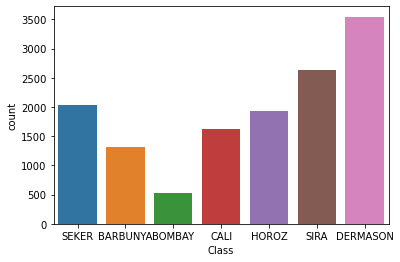

In [16]:
sns.countplot(x='Class', data = df)

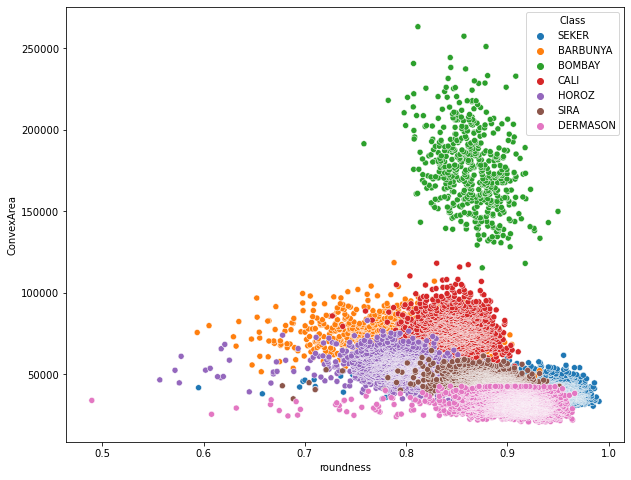

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.roundness, y=df['ConvexArea'], hue=df.Class)
plt.show()

In [18]:
class_={'DERMASON:0','SIRA:1','SEKER:2','HOROZ:3','CALI:4','BARBUNYA:5','BOMBAY:6'}
df['Class']=df['Class'].replace(class_)

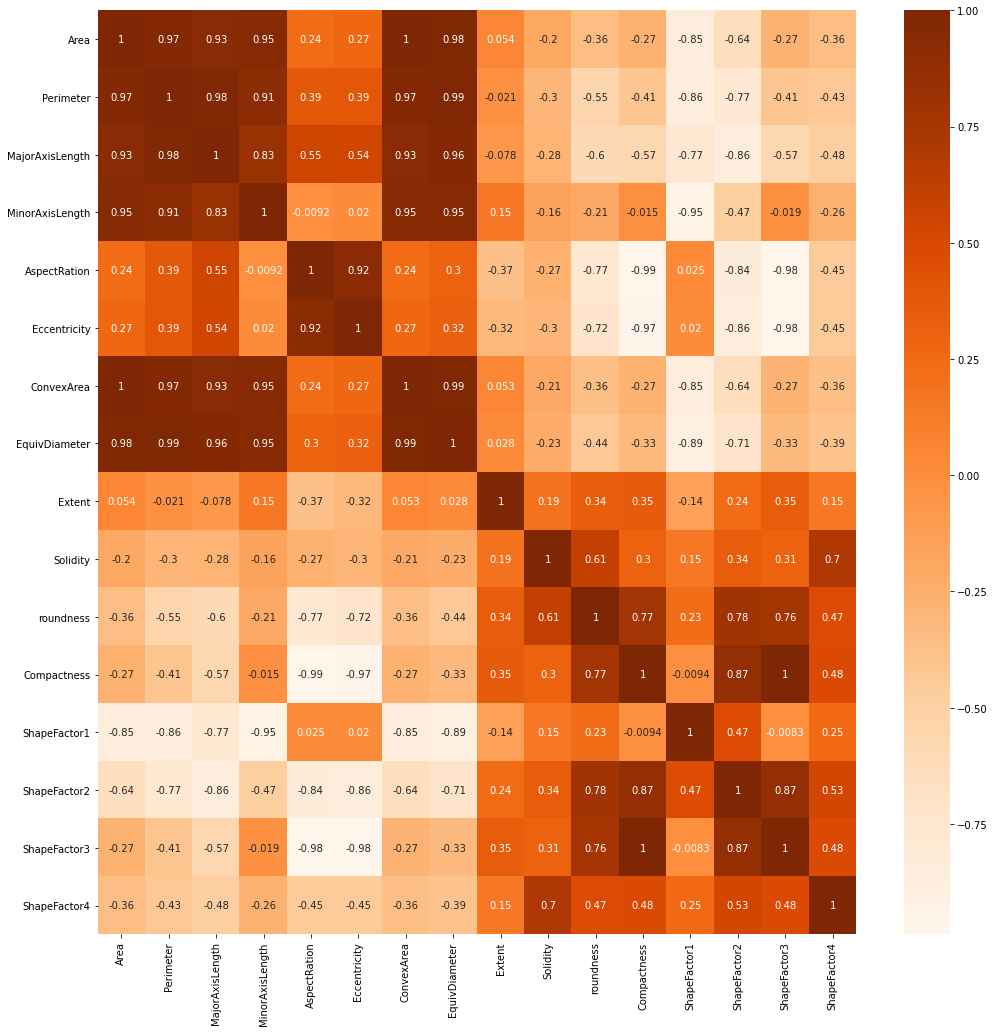

In [19]:
plt.figure(figsize=(17,17))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Oranges)
plt.show()

# Training  & Testing 

In [20]:
x = df.drop(['Class'], axis=1)
y = df.Class

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=15)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Logistic Regression

In [23]:
lm = LogisticRegression(random_state=20, n_jobs=5)
lm.fit(xtrain, ytrain)

LogisticRegression(n_jobs=5, random_state=20)

# Predection 

In [24]:
ypred_train = lm.predict(xtrain)
ypred_test = lm.predict(xtest)

# Confusion Matrix 

In [31]:
 cm = confusion_matrix(ytest, ypred_test)
cm

array([[355,   0,  30,   0,   4,   3,   7],
       [  0, 144,   1,   0,   0,   0,   0],
       [ 23,   0, 460,   0,  12,   1,   4],
       [  0,   0,   0, 910,   8,  29,  96],
       [  7,   0,  21,   4, 533,   0,  20],
       [  2,   0,   1,  15,   0, 567,  24],
       [  6,   0,   5,  89,  19,  18, 666]], dtype=int64)

<AxesSubplot:>

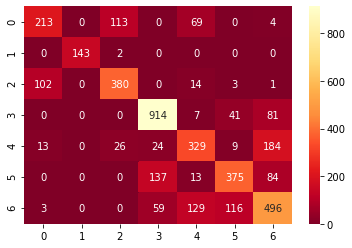

In [26]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd_r" ,fmt='g')

# Accuracy

In [27]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac1 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 70.10601448514747
Accuracy of testing data: 69.7845249755142


# Classification report

In [28]:
target_names = ['Class']
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

    BARBUNYA       0.64      0.53      0.58       399
      BOMBAY       1.00      0.99      0.99       145
        CALI       0.73      0.76      0.74       500
    DERMASON       0.81      0.88      0.84      1043
       HOROZ       0.59      0.56      0.57       585
       SEKER       0.69      0.62      0.65       609
        SIRA       0.58      0.62      0.60       803

    accuracy                           0.70      4084
   macro avg       0.72      0.71      0.71      4084
weighted avg       0.70      0.70      0.70      4084



# Decision Tree

In [29]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=42)

# Prediction 

In [30]:
ypred_train = dt.predict(xtrain)
ypred_test = dt.predict(xtest)

# # Confusion Matrix 

In [32]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[355,   0,  23,   0,   7,   2,   6],
       [  0, 144,   0,   0,   0,   0,   0],
       [ 30,   1, 460,   0,  21,   1,   5],
       [  0,   0,   0, 910,   4,  15,  89],
       [  4,   0,  12,   8, 533,   0,  19],
       [  3,   0,   1,  29,   0, 567,  18],
       [  7,   0,   4,  96,  20,  24, 666]], dtype=int64)

<AxesSubplot:>

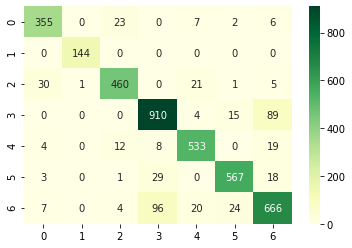

In [33]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn" ,fmt='g')

[Text(167.4, 190.26, 'X[2] <= 280.712\ngini = 0.827\nsamples = 9527\nvalue = [923, 377, 1130, 2503, 1343, 1418, 1833]'), Text(83.7, 135.9, 'X[12] <= 0.007\ngini = 0.541\nsamples = 4039\nvalue = [4, 0, 1, 2380, 11, 1309, 334]'), Text(41.85, 81.53999999999999, 'X[11] <= 0.853\ngini = 0.227\nsamples = 1408\nvalue = [4, 0, 1, 70, 1, 1232, 100]'), Text(20.925, 27.180000000000007, 'gini = 0.571\nsamples = 153\nvalue = [0, 0, 0, 43, 1, 21, 88]'), Text(62.775000000000006, 27.180000000000007, 'gini = 0.068\nsamples = 1255\nvalue = [4, 0, 1, 27, 0, 1211, 12]'), Text(125.55000000000001, 81.53999999999999, 'X[3] <= 176.645\ngini = 0.22\nsamples = 2631\nvalue = [0, 0, 0, 2310, 10, 77, 234]'), Text(104.625, 27.180000000000007, 'gini = 0.068\nsamples = 2000\nvalue = [0, 0, 0, 1930, 10, 4, 56]'), Text(146.475, 27.180000000000007, 'gini = 0.544\nsamples = 631\nvalue = [0, 0, 0, 380, 0, 73, 178]'), Text(251.10000000000002, 135.9, 'X[11] <= 0.729\ngini = 0.791\nsamples = 5488\nvalue = [919, 377, 1129, 12

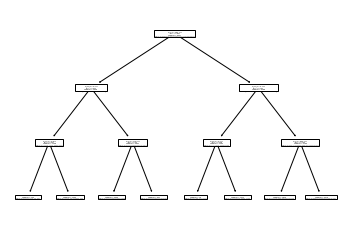

In [36]:
 from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=3)
clf_tree.fit(xtrain, ytrain)
print(tree.plot_tree(clf_tree))

# Accuracy

In [37]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac2 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 100.0
Accuracy of testing data: 89.00587659157688


# Classification Report

In [38]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

    BARBUNYA       0.90      0.89      0.90       399
      BOMBAY       1.00      0.99      1.00       145
        CALI       0.89      0.92      0.90       500
    DERMASON       0.89      0.87      0.88      1043
       HOROZ       0.93      0.91      0.92       585
       SEKER       0.92      0.93      0.92       609
        SIRA       0.82      0.83      0.82       803

    accuracy                           0.89      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.89      0.89      0.89      4084



# KNN Classifer

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

# Predection 

In [40]:
ypred_train = knn.predict(xtrain)
ypred_test = knn.predict(xtest)

# Confusion Matrix

In [41]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[197,   1, 150,   0,  62,   3,  12],
       [  0, 144,   0,   0,   0,   0,   0],
       [156,   0, 326,   0,  41,   0,   5],
       [  0,   0,   0, 923,  17, 108,  98],
       [ 35,   0,  22,   4, 378,   8,  62],
       [  0,   0,   0,  55,   1, 393,  38],
       [ 11,   0,   2,  61,  86,  97, 588]], dtype=int64)

<AxesSubplot:>

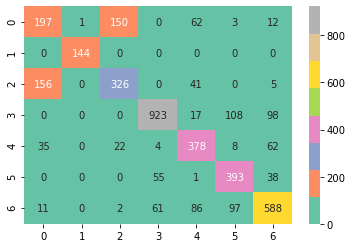

In [42]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Set2" ,fmt='g')

# Accuracy 

In [43]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac3 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 85.04251075889577
Accuracy of testing data: 72.20861900097944


# Classification  Report 

In [44]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

    BARBUNYA       0.46      0.49      0.48       399
      BOMBAY       1.00      0.99      1.00       145
        CALI       0.62      0.65      0.63       500
    DERMASON       0.81      0.88      0.84      1043
       HOROZ       0.74      0.65      0.69       585
       SEKER       0.81      0.65      0.72       609
        SIRA       0.70      0.73      0.71       803

    accuracy                           0.72      4084
   macro avg       0.73      0.72      0.72      4084
weighted avg       0.73      0.72      0.72      4084



# Naive  Bayes Classifer

### Feature Scaling 

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [46]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
gnb = GaussianNB()

In [49]:
gnb.fit(x_train, y_train)

GaussianNB()

# Predection

In [50]:
y_pred = gnb.predict(x_test)

y_pred

array(['DERMASON', 'DERMASON', 'DERMASON', ..., 'SEKER', 'DERMASON',
       'DERMASON'], dtype='<U8')

## Accuracy  

In [51]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac4 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac4)

Accuracy of training data: 85.04251075889577
Accuracy of testing data: 72.20861900097944


# Classification report 

In [52]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

    BARBUNYA       0.46      0.49      0.48       399
      BOMBAY       1.00      0.99      1.00       145
        CALI       0.62      0.65      0.63       500
    DERMASON       0.81      0.88      0.84      1043
       HOROZ       0.74      0.65      0.69       585
       SEKER       0.81      0.65      0.72       609
        SIRA       0.70      0.73      0.71       803

    accuracy                           0.72      4084
   macro avg       0.73      0.72      0.72      4084
weighted avg       0.73      0.72      0.72      4084



# SVM 
#### Feature Scaling

In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
dataAttributes = df.drop("Class",axis=1)
dataClasses = df[["Class"]]

In [55]:
x_train, x_test, y_train, y_test = train_test_split(dataAttributes,dataClasses, test_size = 0.2, train_size=0.8, random_state=0)

In [56]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)


In [57]:
y_pred

array(['DERMASON', 'DERMASON', 'DERMASON', ..., 'SEKER', 'DERMASON',
       'DERMASON'], dtype='<U8')

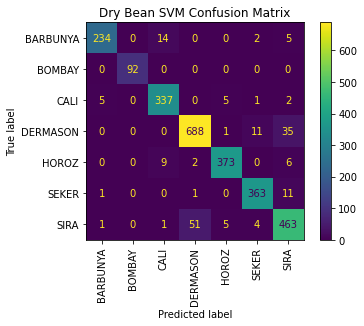

In [58]:
svmClf = svm.SVC(gamma=0.14, C=1, random_state = 0)
svmClf.fit(x_train,np.ravel(y_train))

plot_confusion_matrix(svmClf, x_test, y_test)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean SVM Confusion Matrix')
plt.show()  

In [59]:
predictedSVM = svmClf.predict(x_test)
reportSVM = classification_report(y_test, predictedSVM, output_dict=True)
reportdfSVM = pd.DataFrame(reportSVM).transpose()
reportdfSVM

,precision,recall,f1-score,support
BARBUNYA,0.970954,0.917647,0.943548,255.000000
BOMBAY,1.000000,1.000000,1.000000,92.000000
CALI,0.933518,0.962857,0.947961,350.000000
DERMASON,0.927224,0.936054,0.931618,735.000000
HOROZ,0.971354,0.956410,0.963824,390.000000
SEKER,0.952756,0.965426,0.959049,376.000000
SIRA,0.886973,0.881905,0.884432,525.000000
accuracy,0.936467,0.936467,0.936467,0.936467
macro avg,0.948968,0.945757,0.947205,2723.000000
weighted avg,0.936673,0.936467,0.936449,2723.000000


# Accuracy 

In [60]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac5 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac5)

Accuracy of training data: 85.04251075889577
Accuracy of testing data: 72.20861900097944


## Performance comparision of  all Supervised  Learning Methods 

In [61]:
accuracy =  {ac1: 'Logistic Regression', ac2:'Decission Tree', ac3:'kNN', ac4: 'Naive_bayes',ac5:'SVM'}

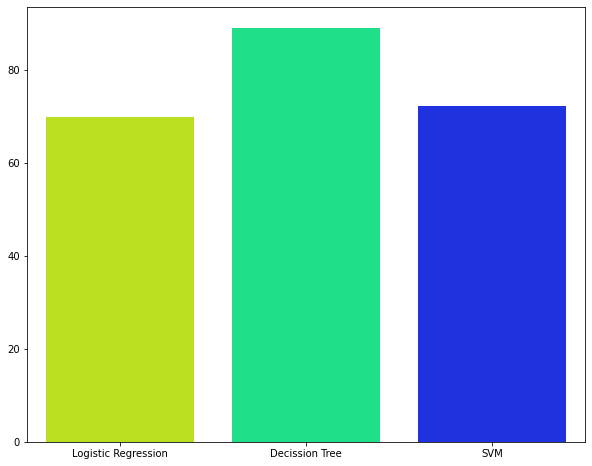

In [62]:
plt.figure(figsize=(10, 8))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');

# Conclusions

###### We applied data exploration methods to understand the dataset better, and used the different data manupulation  techniques
in python different libraries to take care of missing data.

 Used Seaborn  and Graph object to plot different interactive plots describing relationships among variables.


If we compare all Supervised learning method . We understand from above graph that Decision tree show better accuracy than any other methods 